# Exploring Ebay Car Sale Data

In this project, we'll work with a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The data dictionary provided with data is as follows:

The data dictionary provided with data is as follows:

* dateCrawled - When this ad was first crawled. All field-values are taken from this date.
* name - Name of the car.
* seller - Whether the seller is private or a dealer.
* offerType - The type of listing
* price - The price on the ad to sell the car.
* abtest - Whether the listing is included in an A/B test.
* vehicleType - The vehicle Type.
* yearOfRegistration - The year in which the car was first registered.
* gearbox - The transmission type.
* powerPS - The power of the car in PS.
* model - The car model name.
* kilometer - How many kilometers the car has driven.
* monthOfRegistration - The month in which the car was first registered.
* fuelType - What type of fuel the car uses.
* brand - The brand of the car.
* notRepairedDamage - If the car has a damage which is not yet repaired.
* dateCreated - The date on which the eBay listing was created.
* nrOfPictures - The number of pictures in the ad.
* postalCode - The postal code for the location of the vehicle.
* lastSeenOnline - When the crawler saw this ad last online.

The aim of this project is to clean the data and analyze the included used car listings.

In [1]:
import numpy as np
import pandas as pd

In [3]:
autos = pd.read_csv('autos.csv', encoding='Latin-1')

In [4]:
autos

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,"$24,900",control,limousine,2011,automatik,239,q5,"100,000km",1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,"$1,980",control,cabrio,1996,manuell,75,astra,"150,000km",5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,"$13,200",test,cabrio,2014,automatik,69,500,"5,000km",11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,"$22,900",control,kombi,2013,manuell,150,a3,"40,000km",11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

Our dataset have 20 columns and have some column have null values. But most of the columns are filled with non -null values.

## Cleaning column names

We will start by fixing the column names first. Some column names are camelcase instead of snakecase. We will fix them too

In [6]:
autos.columns # seeing the col names

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [9]:
#Lets modify the column names

autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_photos', 'postal_code',
       'last_seen']

autos.head() # checking changed col names

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


The changes in column names were necessary to go with python's convention and to avoid complications in future.

## Intial exploration and cleaning

Initially we will look for: - Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis. - Examples of numeric data stored as text which can be cleaned and converted.

Lets look at descriptive stattistics of the columns

In [12]:
autos.describe(include = 'all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_photos,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-21 20:37:19,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


We can observe that the columns 'seller' and 'offer_type' contains same values. We can drop these columns. 

In [13]:
autos = autos.drop(["seller","offer_type"], axis = 1)

There is a column called 'num_photos' which have the same minimum and max values = 0. This column needs a deeper investigation. 

In [15]:
autos['num_photos'].value_counts()

0    50000
Name: num_photos, dtype: int64

All 50k values are 0! There is no point to keep this column

In [16]:
autos = autos.drop(["num_photos"],axis = 1)

In [17]:
# lets check the dataframe
autos.head()

,date_crawled,name,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


We also need our important numeric columns set as integer type for further calculations. We see that the price and odometer columns are set as text types. Also they have some characters attached with the numbers. Lets clean the col names and convert them to int types.

In [18]:
autos["price"] = (autos["price"]
                          .str.replace("$","")
                          .str.replace(",","")
                          .astype(int)
                          )
autos["price"].head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price, dtype: int32

In [19]:
autos["odometer"] = (autos["odometer"]
                    .str.replace("km","")
                    .str.replace(",","")
                    .astype(int))

In [21]:
# Also lets change the odometer column name 

autos.rename({"odometer" : "odometer_km"}, axis = 1, inplace = True)
autos["odometer_km"].head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

## Exploring the odometer and price columns

We'll start by analyzing the odometer_km and price columns. Here's the steps we'll take:

Analyze the columns using minimum and maximum values and look for any values that look unrealistically high or low (outliers) that we might want to remove.
We'll use:
* Series.unique().shape to see how many unique values
* Series.describe() to view min/max/median/mean etc
* Series.value_counts(), with some variations:
    * chained to .head() if there are lots of values. 
    * Because Series.value_counts() returns a series, we can use Series.sort_index() with ascending= True or False to view the   highest and lowest values with their counts (can also chain to head() here).
* When removing outliers, we can do df[(df["col"] > x ) & (df["col"] < y )], but it's more readable to use df[df["col"].between(x,y)]

In [29]:
# for odometer 

autos["odometer_km"].value_counts()


150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

There are more high mileage than low mileage cars.

In [33]:
# for price 

autos["price"].unique().shape 

(2357,)

There are 2357 unique prices. Lets check some stats 

In [35]:

print(autos["price"].describe())

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


The minimum value is 0 ! How can this be ? We might need to dig deeper. 

In [36]:
autos["price"].value_counts().head(20)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
700      395
4500     394
300      384
2200     382
950      379
Name: price, dtype: int64

There are 1,421 cars listed with $0 price - given that this is only 2% of the of the cars, we might consider removing these rows. The maximum price is one hundred million dollars, which seems a lot, let's look at the highest prices further.

In [39]:
autos["price"].value_counts().sort_index(ascending = False).head(20)

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
350000      1
345000      1
299000      1
295000      1
265000      1
259000      1
250000      1
220000      1
198000      1
197000      1
Name: price, dtype: int64

In [40]:
autos["price"].value_counts().sort_index(ascending=True).head(20)

0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
13       2
14       1
15       2
17       3
18       1
20       4
25       5
29       1
30       7
35       1
Name: price, dtype: int64

**Detecting outliers** : We will definitely remove the rows which have 0 price. We will keep $1 because ebay auction starts from $1. 

we can see that after 350,000 value, the price suddenly goes up to 999990. We can detect the prices after 350000 as outliers. So we will remove them too. 



In [47]:
autos = autos[autos["price"].between(1,351000)]
autos["price"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price, dtype: float64

This seems like a true picture for our analysis to land on. 

## Exploring the date columns

There are 5 columns that should represent date values. Some of these columns were created by the crawler, some came from the website itself. We can differentiate by referring to the data dictionary:

- `date_crawled`: added by the crawler
- `last_seen`: added by the crawler
- `ad_created`: from the website
- `registration_month`: from the website
- `registration_year`: from the website

Right now, the date_crawled, last_seen, and ad_created columns are all identified as string values by pandas. We need to convert them to numerical representations so that we can understand them quantitatively. We'll explore each of these columns to learn more about the listings.


In [48]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


The first 10 characters represent the day (e.g. 2016-03-12). To understand the date range, we can extract just the date values, use Series.value_counts() to generate a distribution, and then sort by the index.

In [53]:
(autos['date_crawled']
    .str[:10] # extracting the date
    .value_counts(normalize=True, dropna=False) # represent the date counts as percentages
    .sort_index() # sort from earliest date
) 

2016-03-05    0.025327
2016-03-06    0.014043
2016-03-07    0.036014
2016-03-08    0.033296
2016-03-09    0.033090
2016-03-10    0.032184
2016-03-11    0.032575
2016-03-12    0.036920
2016-03-13    0.015670
2016-03-14    0.036549
2016-03-15    0.034284
2016-03-16    0.029610
2016-03-17    0.031628
2016-03-18    0.012911
2016-03-19    0.034778
2016-03-20    0.037887
2016-03-21    0.037373
2016-03-22    0.032987
2016-03-23    0.032225
2016-03-24    0.029342
2016-03-25    0.031607
2016-03-26    0.032204
2016-03-27    0.031092
2016-03-28    0.034860
2016-03-29    0.034099
2016-03-30    0.033687
2016-03-31    0.031834
2016-04-01    0.033687
2016-04-02    0.035478
2016-04-03    0.038608
2016-04-04    0.036487
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

Looks like the site was crawled daily over roughly a one month period in March and April 2016. 

In [54]:
(autos["last_seen"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
        )

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009595
2016-03-10    0.010666
2016-03-11    0.012375
2016-03-12    0.023783
2016-03-13    0.008895
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016452
2016-03-17    0.028086
2016-03-18    0.007351
2016-03-19    0.015834
2016-03-20    0.020653
2016-03-21    0.020632
2016-03-22    0.021373
2016-03-23    0.018532
2016-03-24    0.019767
2016-03-25    0.019211
2016-03-26    0.016802
2016-03-27    0.015649
2016-03-28    0.020859
2016-03-29    0.022341
2016-03-30    0.024771
2016-03-31    0.023783
2016-04-01    0.022794
2016-04-02    0.024915
2016-04-03    0.025203
2016-04-04    0.024483
2016-04-05    0.124761
2016-04-06    0.221806
2016-04-07    0.131947
Name: last_seen, dtype: float64

A particular time between the date_crawled and last_seen dates can be determined as the selling period of that car. Lets check if there is any sudden glitch or change in the flow of the percentages connecting to the last_seen dates. 

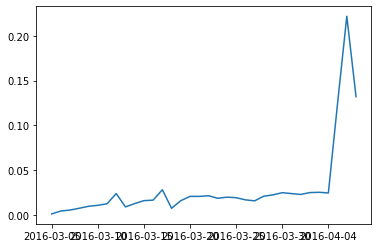

In [64]:
import matplotlib.pyplot as plt

last_seen_viz = autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False).sort_index()

last_seen_viz.plot()
    

**Sudden Glitch** in the last end of the last_seen column distribution. 

The last three days(5th,6th and 7th April) contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the **crawling period ending and don't indicate car sales.**

Lets check the ad_created column. 


In [66]:
print(autos["ad_created"].str[:10].unique().shape) # number of unique dates in ad_created column

(76,)


2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038855
2016-04-04    0.036858
2016-04-05    0.011819
2016-04-06    0.003253
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64


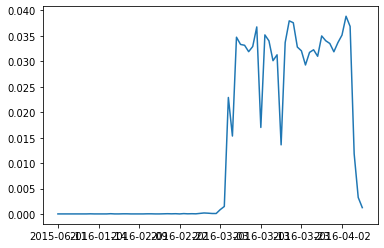

In [75]:
# extract the date from ad_created column and show percentages of the dates

ad_created_viz = (autos["ad_created"]
        .str[:10]
        .value_counts(normalize=True, dropna=False)
        .sort_index()
)
print(ad_created_viz)
ad_created_viz.plot()

There are more ads created in the later half of the time frame. 

Lets check the registration_year column. 

In [76]:
autos["registration_year"].describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Looking at this column, we note some odd values. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future.

## Dealing with incorrect registration year data 

Because a car can't be first registered after the listing was seen, any vehicle with a registration year above 2016 is definitely inaccurate. Determining the earliest valid year is more difficult. Realistically, it could be somewhere in the first few decades of the 1900s.

Let's count the number of listings with cars that fall outside the 1900 - 2016 interval and see if it's safe to remove those rows entirely, or if we need more custom logic.

In [82]:
# Check waht percentage of the data is like this

(~autos["registration_year"].between(1900,2016)).sum()/autos.shape[0] # the til-deh ~ probably indicates the range outside the mentioned years


0.038793369710697

As less than 4% records are odds, we can remove these rows.

In [85]:
autos = autos[autos["registration_year"].between(1900,2016)] # removed the rows outside the mentioned range
autos["registration_year"].value_counts(normalize=True).head(10)

2000    0.067608
2005    0.062895
1999    0.062060
2004    0.057904
2003    0.057818
2006    0.057197
2001    0.056468
2002    0.053255
1998    0.050620
2007    0.048778
Name: registration_year, dtype: float64

It appears that most vehicles were registered in the year 2000.

## Exploring price by brand

We can use aggregation to understand the brand column. 

Basically, we will see which brands sell for the most value. 

In [87]:
autos["brand"].value_counts(normalize=True).head()

volkswagen       0.211264
bmw              0.110045
opel             0.107581
mercedes_benz    0.096463
audi             0.086566
Name: brand, dtype: float64

German manufacturers represent four out of the top five brands, almost 50% of the overall listings. Volkswagen is by far the most popular brand, with approximately double the cars for sale of the next two brands combined.

we will limit our analysis to brands representing more than 5% of total listings.

In [92]:
brand_counts = autos["brand"].value_counts(normalize=True)
common_brands = brand_counts[brand_counts > .05].index
print(common_brands)

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford'], dtype='object')


In [93]:
# Now that we've got the popular names in a list, we will do the rest with these 6 brands

brand_mean_prices = {} # empty dictionary where we will store the brand and its mean price

for brand in common_brands :
    brand_only = autos[autos["brand"] == brand] # selec the particular brand from the column
    mean_price = brand_only["price"].mean() # get the prices of that brand and get the mean
    brand_mean_prices[brand] = int(mean_price) # store the brand name with its price
brand_mean_prices 

{'volkswagen': 5402,
 'bmw': 8332,
 'opel': 2975,
 'mercedes_benz': 8628,
 'audi': 9336,
 'ford': 3749}


Of the top 5 brands, there is a distinct price gap:

* Audi, BMW and Mercedes Benz are more expensive
* Ford and Opel are less expensive
* Volkswagen is in between - this may explain its popularity, it may be a 'best of 'both worlds' option

## Storing aggregate data in a dataframe

For the top 6 brands, let's use aggregation to understand the average mileage for those cars and if there's any visible link with mean price.

We will create series objects for mean mileage and mean prices. Then we will create dataframes from those two series. It will help us see neat and clean information about the top brands.

In [94]:
# dataframe for mean prices

bmp_series = pd.Series(brand_mean_prices) # create series
pd.DataFrame(bmp_series, columns=["mean_price"]) # create dataframe

,mean_price
volkswagen,5402
bmw,8332
opel,2975
mercedes_benz,8628
audi,9336
ford,3749


In [96]:
# creating dictionary and then dataframe for mean mileage

brand_mean_mileage = {}

for brand in common_brands:
    brand_only = autos[autos["brand"] == brand]
    mean_mileage = brand_only["odometer_km"].mean()
    brand_mean_mileage[brand] = int(mean_mileage)
    


In [97]:
brand_mean_mileage

{'volkswagen': 128707,
 'bmw': 132572,
 'opel': 129310,
 'mercedes_benz': 130788,
 'audi': 129157,
 'ford': 124266}

In [99]:
mean_mileage = pd.Series(brand_mean_mileage).sort_values(ascending=False)
mean_prices = pd.Series(brand_mean_prices).sort_values(ascending=False)

brand_info = pd.DataFrame(mean_mileage,columns=['mean_mileage']) # the values column will be called as mean_mileage
brand_info

,mean_mileage
bmw,132572
mercedes_benz,130788
opel,129310
audi,129157
volkswagen,128707
ford,124266


In [101]:
brand_info["mean_prices"] = mean_prices # creating a column called mean_prices and adding the values of the mean prices series
brand_info

,mean_mileage,mean_prices
bmw,132572,8332
mercedes_benz,130788,8628
opel,129310,2975
audi,129157,9336
volkswagen,128707,5402
ford,124266,3749


Although their prices vary, their mean mileage doesnt vary that much. There is a slight trend to the more expensive vehicles having higher mileage, with the less expensive vehicles having lower mileage.